### Unsupervised Learning: Clustering: 

- K-Means Clustering
- Agglomerative Custering
- DBScan Clustering


```Python
The Business Problem:

A software company wants to analyze customer behavior and identify patterns in their user data to optimize their product offerings and improve customer retention. The company has a dataset containing information about 10,000 customers, including their subscription type, usage metrics (number of logins, session duration, feature usage), customer lifetime, and revenue generated.

The business problem focuses on customer segmentation (clustering) for a software product, utilizing clustering techniques like Agglomerative Clustering and K-Means. The segmentation is based on diverse customer attributes, including subscription type, usage metrics (number of logins, session duration, feature usage), customer lifetime, and revenue generated.
```

#### By clustering customers based on these behavioral and financial factors, the company aims to derive actionable insights that will support more:

- `Targeted Marketing:` Enables personalized campaigns for different user segments.
- `Pricing Strategies:` Helps refine pricing tiers based on usage and revenue patterns.
- `Resource Allocation:` Identifies high-value customers for focused engagement.
- `Retention:` Detects low-engagement users for proactive retention efforts.

#### <u> Dataset Description: </u>

`User ID:` A unique identifier for each user (numeric).

`Subscription Type:` The type of subscription a user has, which could be one of the following categories: 
> - Free: No payment required, limited access to features. 
> - Basic: Paid subscription with standard access to features. 
> - Pro: Premium subscription with full access to all features. 

`Number of Logins:` The total number of times a user has logged into the software product.

`Avg Session Duration (mins):` The average duration (in minutes) of each session a user spends in the software product.

`Feature Usage Count:` The number of distinct features a user actively uses during their time with the product.

`Customer Lifetime (months):` The total duration (in months) the user has been a customer.

`Revenue Generated ($):` The total revenue generated by the user for the business, in USD.
```

In [1]:
# Uncomment to run on google-colab
# %pip install scipy tabulate numpy scikit-learn matplotlib seaborn

In [1]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score, calinski_harabasz_score
from sklearn.metrics.cluster import contingency_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
# Load the necessary libraries and the dataset
import pandas as pd

# Load the dataset
df = pd.read_csv('./datasets/software_product_user_data.csv')  # Update the path to your uploaded dataset
df.colums = df.columns.str.strip()
# Display the first few rows to verify the dataset
df.head()

C:\Users\Debrup Banerjee\AppData\Local\Temp\ipykernel_18744\1352561546.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.colums = df.columns.str.strip()


User ID Subscription Type  Number of Logins  Avg Session Duration (mins)  \
0     2561              Free                14                    22.178507   
1     2562               Pro                17                    31.015401   
2     2563               Pro                18                    32.819273   
3     2564               Pro                12                    28.140540   
4     2565              Free                 6                    19.938184   

   Feature Usage Count  Customer Lifetime (months)  Revenue Generated ($)  
0                    4                          14             100.471472  
1                    7                          16             160.723959  
2                    7                          17             175.226528  
3                    4                          11             118.400847  
4                    3                           6              57.314870

Dataset Description:

`User ID`:  A unique identifier for each user/customer (numeric).

`Subscription Type:` The type of subscription a user has, which could be one of the following categories: 
> - Free: No payment required, limited access to features. 
> - Basic: Paid subscription with standard access to features. 
> - Pro: Premium subscription with full access to all features. 

`Number of Logins:` The total number of times a user has logged into the software product.

`Avg Session Duration (mins):` The average duration (in minutes) of each session a user spends in the software product.

`Feature Usage Count:` The number of distinct features a user actively uses during their time with the product.

`Customer Lifetime (months):` The total duration (in months) the user has been a customer.

`Revenue Generated ($):` The total revenue generated by the user for the business, in USD.
```

In [48]:
import pandas as pd

# Check if the 'User ID' column exists, and drop it if present
if 'User ID' in df.columns:
    df.drop(columns=['User ID'], axis=1, inplace=True)

# Generate summary statistics for numerical columns
numerical_stats = df.describe()

# Generate frequency counts for categorical columns (if any)
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_stats = {}
for column in categorical_columns:
    categorical_stats[column] = df[column].value_counts()

# Create a DataFrame for categorical stats
categorical_stats_df = pd.concat([stats.rename(column) for column, stats in categorical_stats.items()], axis=1)

# Display the numerical stats DataFrame
display(numerical_stats)

# Display the categorical stats DataFrame
display(categorical_stats_df)


Number of Logins  Avg Session Duration (mins)  Feature Usage Count  \
count       5005.000000                  5005.000000          5005.000000   
mean          17.692907                    35.259296             6.574825   
std           24.068252                    18.326090             3.651353   
min            5.000000                    10.004903             2.000000   
25%           11.000000                    22.430058             4.000000   
50%           17.000000                    34.889065             6.000000   
75%           23.000000                    47.461554             9.000000   
max          848.000000                   499.468365            98.000000   

       Customer Lifetime (months)  Revenue Generated ($)  
count                 5005.000000            5005.000000  
mean                    17.160639             176.454685  
std                      8.464895              86.126830  
min                      5.000000              50.161396  
25%                     11.000000             112.686096  
50%                     17.000000             174.701908  
75%                     23.000000             238.849057  
max                    196.000000            1961.691771

Subscription Type
Subscription Type                   
Free                            1707
Pro                             1658
Basic                           1640

```Python
Overall Summary:
The dataset reflects a wide variation in user engagement, with most users showing moderate levels of logins, session duration, feature usage, and revenue generation. However, there are some outliers who exhibit much higher engagement and spending patterns.
```


### <u> Formulae for Scalers</u>:

## 1. StandardScaler

The formula for the **StandardScaler** is as follows:

```math
z = \frac{x - \mu}{\sigma}
```
Where:
 - \( x \) is the original data point. 
 - \( \mu \) is the mean of the data.
 - \( \sigma \) is the standard deviation of the data.

## 2. RobustScaler

The formula for the **RobustScaler** is as follows:
```math
z = \frac{x - Q_2}{Q_3 - Q_1}
```
Where:
- \( x \) is the original data point.
- \( Q_2 \) is the median of the data (also known as the 50th percentile).
- \( Q_1 \) is the first quartile (25th percentile).
- \( Q_3 \) is the third quartile (75th percentile).
- The difference \( Q_3 - Q_1 \) is known as the **interquartile range (IQR)**.

In [49]:
from sklearn.preprocessing import RobustScaler, StandardScaler
import numpy as np
import pandas as pd

# Sample data (including outliers)
data = {
         'Sample_Feature': [2, 3, 10, 12, 100],  # Notice the outlier (10000)
}

# Create a DataFrame
df1 = pd.DataFrame(data)

# Initialize RobustScaler and StandardScaler
scaler_robust = RobustScaler()
scaler_standard = StandardScaler()

# Apply the RobustScaler to the numerical columns
scaled_data_robust = scaler_robust.fit_transform(df1)
# Apply the StandardScaler to the numerical columns
scaled_data_std = scaler_standard.fit_transform(df1)

# Create separate DataFrames for the scaled data
scaled_df_robust = pd.DataFrame(scaled_data_robust, columns=df1.columns)
scaled_df_std = pd.DataFrame(scaled_data_std, columns=df1.columns)

# Concatenate original, robust-scaled, and standard-scaled DataFrames side by side
final_df = pd.concat([df1.add_prefix('Original_'), 
                      scaled_df_robust.add_suffix('_Robust'), 
                      scaled_df_std.add_suffix('_Standard')], axis=1)

# Display the final DataFrame
final_df


Original_Sample_Feature  Sample_Feature_Robust  Sample_Feature_Standard
0                        2              -0.888889                -0.624002
1                        3              -0.777778                -0.597335
2                       10               0.000000                -0.410668
3                       12               0.222222                -0.357335
4                      100              10.000000                 1.989340

```Python
Key Points:
RobustScaler:
-------------
As seen in the 'Sample_Feature_Robust' column, the non-outlier values (2, 3, 10, 12) are scaled to a reasonable range between -0.89 and 0.22, whereas the outlier (100) is assigned a value of 10.0. The other values remain spread out and less compressed.

StandardScaler:
---------------
In the 'Sample_Feature_Standard' column, all values are scaled closer to each other. The non-outlier values (2, 3, 10, 12) are squashed into a narrow range between -0.62 and -0.36, while the outlier (100) gets scaled to a higher value (1.99).

RobustScaler maintains the relative spread of non-outlier values while still handling outliers, making it more suitable when your data contains outliers.
```

In [50]:
# Apply Robust and Standard Scaling...
# Identify the numerical columns to scale
numerical_features = ['Number of Logins', 'Avg Session Duration (mins)', 
                      'Feature Usage Count', 'Customer Lifetime (months)', 
                      'Revenue Generated ($)']

# Initialize the RobustScaler and StandardScaler
robust_scaler = RobustScaler()
standard_scaler = StandardScaler()

# Apply the RobustScaler and StandardScaler to the numerical columns
df_scaled_robust = pd.DataFrame(robust_scaler.fit_transform(df[numerical_features]), columns=numerical_features)
df_scaled_standard = pd.DataFrame(standard_scaler.fit_transform(df[numerical_features]), columns=numerical_features)

# Add suffixes to distinguish scaled columns
df_scaled_robust = df_scaled_robust.add_suffix('_Robust')
df_scaled_standard = df_scaled_standard.add_suffix('_Standard')

# Concatenate original, robust-scaled, and standard-scaled DataFrames side by side
df_combined = pd.concat([df, df_scaled_robust, df_scaled_standard], axis=1)
df_scaled_robust.head(5)


Number of Logins_Robust  Avg Session Duration (mins)_Robust  \
0                -0.250000                           -0.507783   
1                 0.000000                           -0.154752   
2                 0.083333                           -0.082688   
3                -0.416667                           -0.269601   
4                -0.916667                           -0.597283   

   Feature Usage Count_Robust  Customer Lifetime (months)_Robust  \
0                        -0.4                          -0.250000   
1                         0.2                          -0.083333   
2                         0.2                           0.000000   
3                        -0.4                          -0.500000   
4                        -0.6                          -0.916667   

   Revenue Generated ($)_Robust  
0                     -0.588369  
1                     -0.110793  
2                      0.004158  
3                     -0.446257  
4                     -0.930440

In [51]:
# Calculate required statistics for the 'Revenue Generated ($)' columns

# Define a function to calculate IQR, Q1-IQR, Q3+IQR
def calculate_iqr_stats(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    # Handle mode as a single value or list of modes
    mode_values = column.mode()  # mode() returns a Series
    mode_result = mode_values.iloc[0] if not mode_values.empty else None  # Take the first mode if available
    
    return {
        'mean'        : column.mean(),
        'std'         : column.std(),
        'median'      : column.median(),
        'mode'        : mode_result, 
        'max'         : column.max(),
        'min'         : column.min(),
        'IQR'         : IQR,
        'Q3+(1.5*IQR)': Q3 + (1.5 * IQR),
        'Q1-(1.5*IQR)': Q1 - (1.5 * IQR)
    }

# Apply the function to the required columns
stats_original = calculate_iqr_stats(df_revenue_scaled['Revenue Generated ($)'])
stats_robust = calculate_iqr_stats(df_revenue_scaled['Revenue Generated ($)_Robust'])
stats_standard = calculate_iqr_stats(df_revenue_scaled['Revenue Generated ($)_Standard'])

# Create a DataFrame to summarize the statistics
df_stats = pd.DataFrame({
    'Original Revenue Generated': stats_original,
    'Robust Scaled Revenue Generated': stats_robust,
    'Standard Scaled Revenue Generated': stats_standard
})

df_stats


Original Revenue Generated  Robust Scaled Revenue Generated  \
mean                          176.454685                         0.013893   
std                            86.126830                         0.682663   
median                        174.701908                         0.000000   
mode                           50.161396                        -0.987140   
max                          1961.691771                        14.164140   
min                            50.161396                        -0.987140   
IQR                           126.162962                         1.000000   
Q3+(1.5*IQR)                  428.093499                         2.008447   
Q1-(1.5*IQR)                  -76.558347                        -1.991553   

              Standard Scaled Revenue Generated  
mean                               1.675206e-16  
std                                1.000100e+00  
median                            -2.035315e-02  
mode                              -1.466511e+00  
max                                2.073007e+01  
min                               -1.466511e+00  
IQR                                1.464997e+00  
Q3+(1.5*IQR)                       2.922016e+00  
Q1-(1.5*IQR)                      -2.937973e+00

```Python
'RobustScaler 'effectively handles outliers by maintaining a more balanced range for revenue, whereas 'StandardScaler' compresses the bulk of values while amplifying the effect of extreme outliers.
```

### Outliers Analysis:

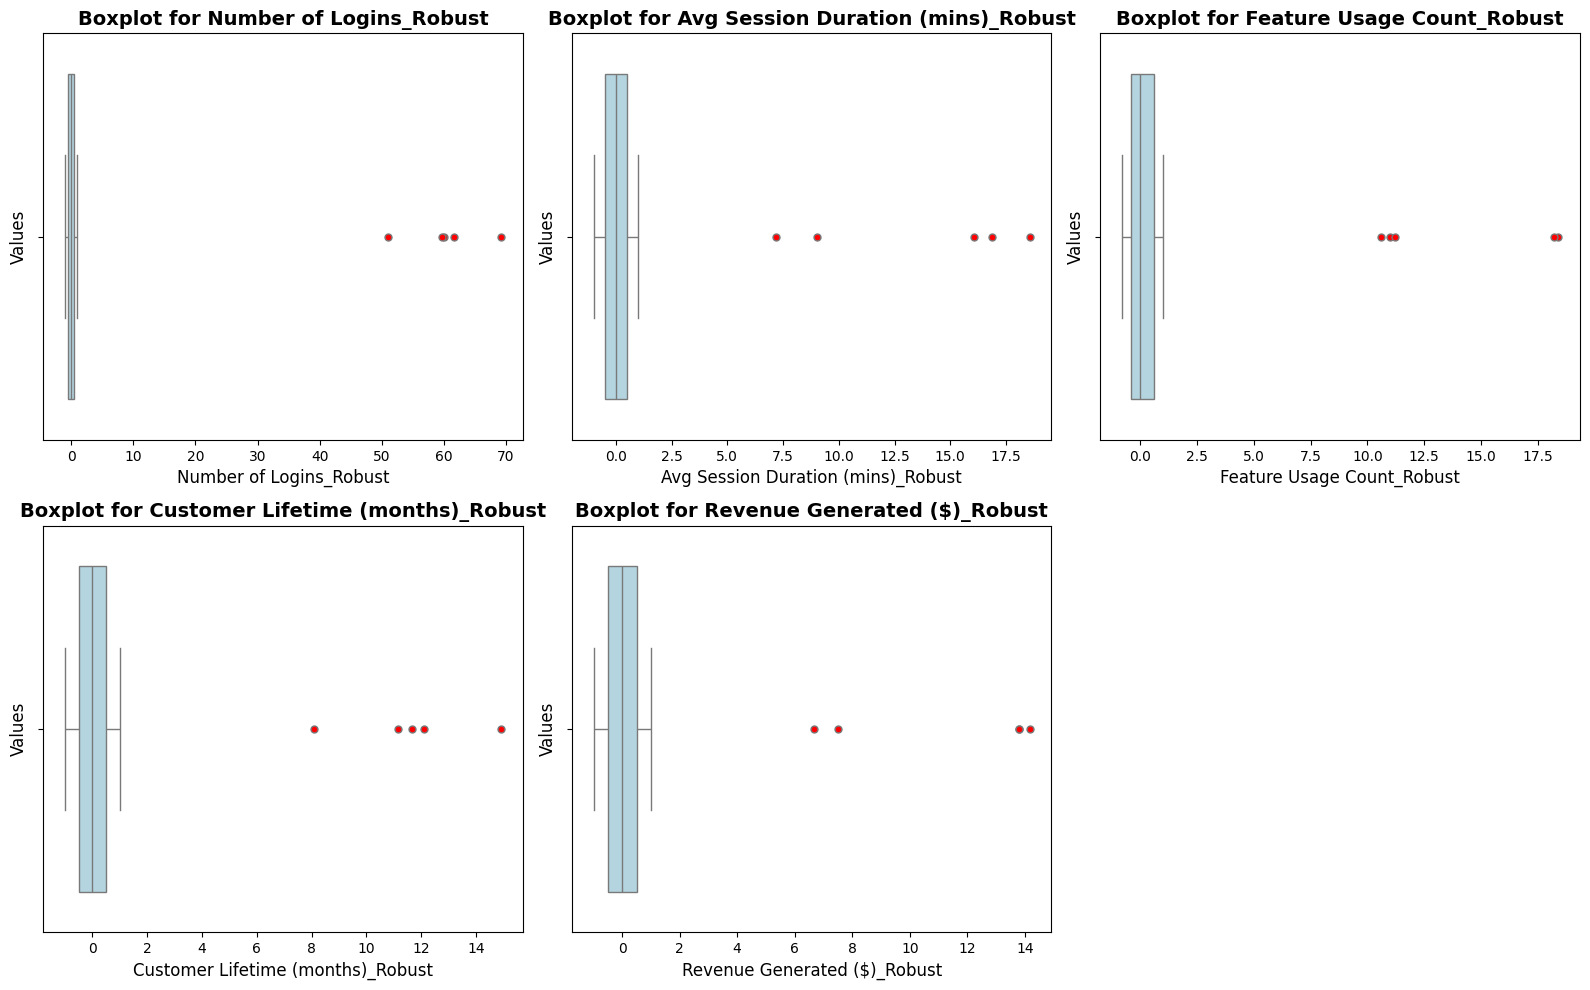

In [52]:
# Boxplot for detecting outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))

# Create individual enhanced boxplots for each numerical feature
for i, column in enumerate(df_scaled_robust, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(
        x=df_scaled_robust[column], 
        color="lightblue", 
        flierprops=dict(markerfacecolor='r', marker='o', markersize=5)  # Red outlier points
    )
    plt.title(f"Boxplot for {column}", fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    
# Adjust the layout for better visual aesthetics
plt.tight_layout()
plt.show()


In [53]:
# Removal of outliers:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(df[numerical_features])

# Create a boolean mask for outliers (Z-score > 3 or < -3)
outliers_mask = (z_scores > 3) | (z_scores < -3)

# Identify outliers
outliers = df[outliers_mask.any(axis=1)]

# Removing outliers from the dataset
filtered_dataset = df[~outliers_mask.any(axis=1)]

# Display the filtered dataset
print(f"Number of outliers removed: {len(outliers)}")
print(f"Filtered dataset shape: {filtered_dataset.shape}")

filtered_dataset.describe(include='all')


Number of outliers removed: 5
Filtered dataset shape: (5000, 6)


Subscription Type  Number of Logins  Avg Session Duration (mins)  \
count               5000       5000.000000                  5000.000000   
unique                 3               NaN                          NaN   
top                 Free               NaN                          NaN   
freq                1704               NaN                          NaN   
mean                 NaN         16.970000                    34.920808   
std                  NaN          7.195683                    14.439130   
min                  NaN          5.000000                    10.004903   
25%                  NaN         11.000000                    22.412517   
50%                  NaN         17.000000                    34.870373   
75%                  NaN         23.000000                    47.405136   
max                  NaN         29.000000                    59.987484   

        Feature Usage Count  Customer Lifetime (months)  Revenue Generated ($)  
count           5000.000000                 5000.000000            5000.000000  
unique                  NaN                         NaN                    NaN  
top                     NaN                         NaN                    NaN  
freq                    NaN                         NaN                    NaN  
mean               6.506000                   17.021800             175.044288  
std                2.876877                    7.193141              72.484345  
min                2.000000                    5.000000              50.161396  
25%                4.000000                   11.000000             112.527295  
50%                6.000000                   17.000000             174.653483  
75%                9.000000                   23.000000             238.549643  
max               11.000000                   29.000000             299.943424

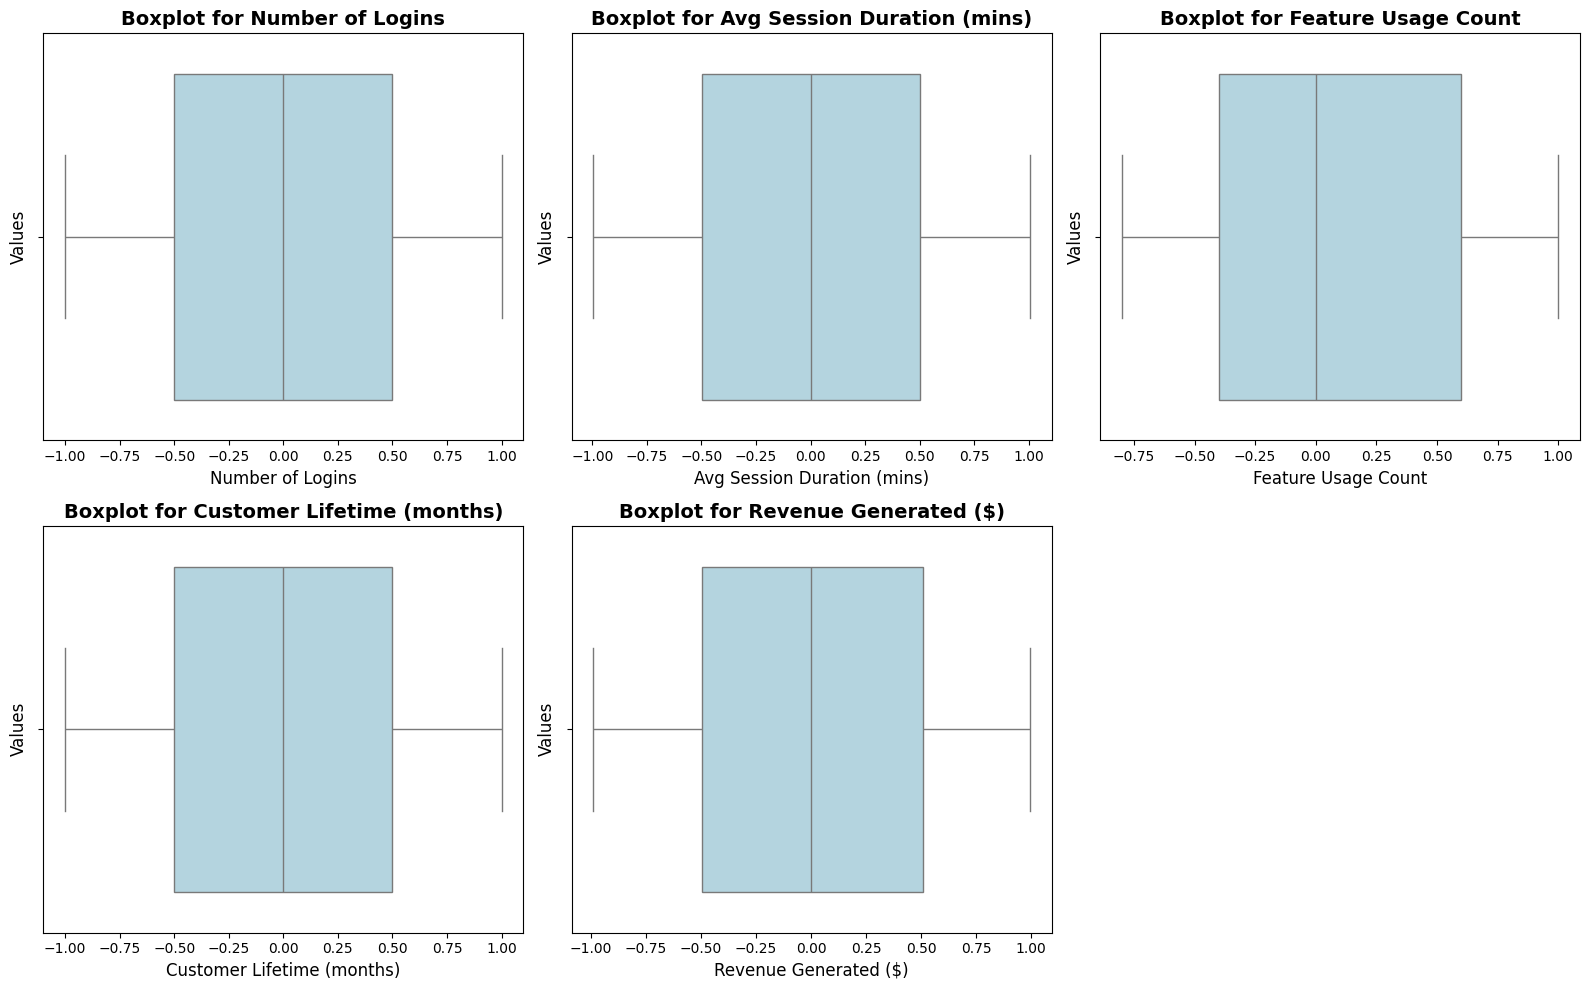

In [54]:
# Boxplot after outlier removal:
numerical_columns = filtered_dataset.select_dtypes(include=['float64', 'int64']).columns
scaler = RobustScaler()
df_outliers_removed = pd.DataFrame(scaler.fit_transform(filtered_dataset[numerical_columns]), columns=numerical_columns)

plt.figure(figsize=(16, 10))

# Create individual enhanced boxplots for each numerical feature
for i, column in enumerate(df_outliers_removed, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(
        x=df_outliers_removed[column], 
        color="lightblue", 
        flierprops=dict(markerfacecolor='r', marker='s', markersize=5)  # Red outlier points
    )
    plt.title(f"Boxplot for {column}", fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Values', fontsize=12)
    
# Adjust the layout for better visual aesthetics
plt.tight_layout()
plt.show()

In [55]:
# Specify categorical and numerical features
categorical_features = ['Subscription Type']
numerical_features = ['Number of Logins', 'Avg Session Duration (mins)', 'Feature Usage Count', 'Customer Lifetime (months)', 'Revenue Generated ($)']

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop=None), categorical_features),
        ('num', RobustScaler(), numerical_features)
    ]
)


# Fit and transform the data using the preprocessor
transformed_data = preprocessor.fit_transform(filtered_dataset)
# Get the feature names after transformations - otherwiae dataframe when displayed shows only 0, 1, 2, 3 etc
cat_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([cat_feature_names, numerical_features])
# Create a DataFrame with the transformed data and feature names
df_transformed = pd.DataFrame(transformed_data, columns=all_feature_names)
df_transformed.head(4)

Subscription Type_Basic  Subscription Type_Free  Subscription Type_Pro  \
0                      0.0                     1.0                    0.0   
1                      0.0                     0.0                    1.0   
2                      0.0                     0.0                    1.0   
3                      0.0                     0.0                    1.0   

   Number of Logins  Avg Session Duration (mins)  Feature Usage Count  \
0         -0.250000                    -0.507825                 -0.4   
1          0.000000                    -0.154244                  0.2   
2          0.083333                    -0.082068                  0.2   
3         -0.416667                    -0.269273                 -0.4   

   Customer Lifetime (months)  Revenue Generated ($)  
0                   -0.250000              -0.588642  
1                   -0.083333              -0.110532  
2                    0.000000               0.004547  
3                   -0.500000              -0.446370

In [56]:
# Build the k-means model for k=3 : show the outputs of the model- centroids, wss and labeled data (resulting clusters)
# instatiate KMeans class and set the number of clusters
km_model = KMeans(n_clusters=3, random_state=10)

# call fit method with data 
km = km_model.fit_predict(df_transformed)

# Coordinates of cluster centers (centroids)
centroids = km_model.cluster_centers_
centroids_df = pd.DataFrame(centroids)  
centroids_df.head()


0             1             2         3         4         5  \
0  0.223048  7.769517e-01 -1.110223e-16  0.330297  0.322538  0.424238   
1  0.351843  3.238329e-01  3.243243e-01 -0.615807 -0.589748 -0.490221   
2  0.384568 -8.881784e-16  6.154321e-01  0.491615  0.479268  0.575926   

          6         7  
0  0.337485  0.328276  
1 -0.612121 -0.586065  
2  0.494342  0.473220

In [57]:
# cluster label for each data point
labels = km_model.labels_ 
labels_df = pd.DataFrame(labels)
labels_df.head()

0
0  1
1  2
2  2
3  1
4  1

C:\Users\Debrup Banerjee\AppData\Local\Temp\ipykernel_18744\3805374671.py:24: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  distance = np.abs(np.cross(point2-point1, point1-point)) / np.linalg.norm(point2-point1)


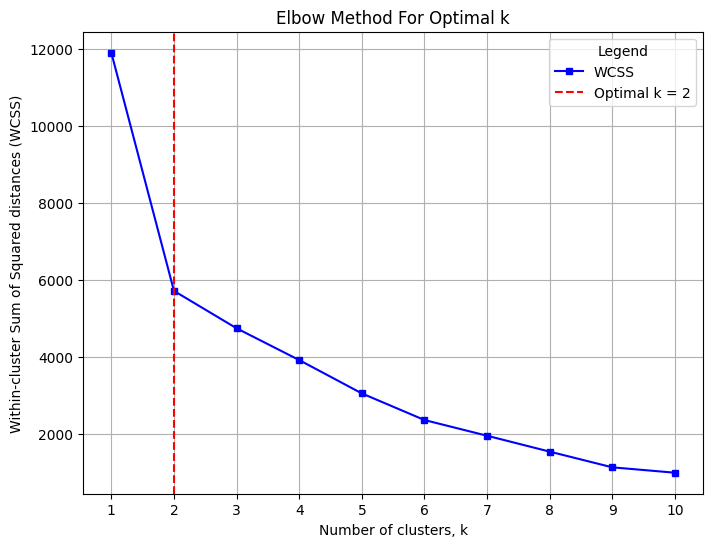

Optimal k value: 2


In [58]:
# Define the range of k values to try
k_values = range(1, 11)
inertias = []

# Fit KMeans and calculate inertia for each k
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_transformed)  # Fit the model
    inertias.append(model.inertia_)  # Append the inertia for this k

# Convert to numpy array for further calculation
inertias = np.array(inertias)

# Manually find the elbow point by finding the point with the maximum distance
# Create a straight line between the first and last points
point1 = np.array([k_values[0], inertias[0]])  # First point (k=1, WCSS)
point2 = np.array([k_values[-1], inertias[-1]])  # Last point (k=max, WCSS)

# Calculate the distance of each point from the line connecting point1 and point2
distances = []
for i in range(len(k_values)):
    point = np.array([k_values[i], inertias[i]])
    # Compute the perpendicular distance from point to the line
    distance = np.abs(np.cross(point2-point1, point1-point)) / np.linalg.norm(point2-point1)
    distances.append(distance)

# Find the index of the maximum distance (the elbow point)
k_optimal = k_values[np.argmax(distances)]

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, 'bs-', markersize=4, label='WCSS')
plt.axvline(x=k_optimal, color='r', linestyle='--', label=f'Optimal k = {k_optimal}')
plt.xlabel('Number of clusters, k')
plt.ylabel('Within-cluster Sum of Squared distances (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_values)
plt.grid(True)

# Add a legend explaining the plot
plt.legend(loc='best', title='Legend')

# Display the plot
plt.show()

# Print the detected optimal k value
print(f"Optimal k value: {k_optimal}")



In [59]:
df_transformed.head(3)

Subscription Type_Basic  Subscription Type_Free  Subscription Type_Pro  \
0                      0.0                     1.0                    0.0   
1                      0.0                     0.0                    1.0   
2                      0.0                     0.0                    1.0   

   Number of Logins  Avg Session Duration (mins)  Feature Usage Count  \
0         -0.250000                    -0.507825                 -0.4   
1          0.000000                    -0.154244                  0.2   
2          0.083333                    -0.082068                  0.2   

   Customer Lifetime (months)  Revenue Generated ($)  
0                   -0.250000              -0.588642  
1                   -0.083333              -0.110532  
2                    0.000000               0.004547

In [62]:
# Fitting K-Means with optimal k(k_optimal is already assigned)

categorical_features = ['Subscription Type_Basic', 'Subscription Type_Free', 'Subscription Type_Pro']
numerical_features = ['Number of Logins', 'Avg Session Duration (mins)', 'Feature Usage Count', 'Customer Lifetime (months)', 'Revenue Generated ($)']

# Define the preprocessing pipeline
preprocessor_encoded_version = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop=None), categorical_features),
        ('num', RobustScaler(), numerical_features)
    ]
)

kmeans_pipeline_no_outliers = Pipeline(steps=[('preprocessor', preprocessor_encoded_version),
                                  ('cluster', KMeans(n_clusters=k_optimal, random_state=42, init='k-means++'))])

# Partition the df dataframe into train and test partitions ...

# Fit and predict clusters
df_transformed['KMeans_Cluster'] = kmeans_pipeline_no_outliers.fit_predict(df_transformed) # Fit the data to the visual
df_transformed.head(3)

Subscription Type_Basic  Subscription Type_Free  Subscription Type_Pro  \
0                      0.0                     1.0                    0.0   
1                      0.0                     0.0                    1.0   
2                      0.0                     0.0                    1.0   

   Number of Logins  Avg Session Duration (mins)  Feature Usage Count  \
0         -0.250000                    -0.507825                 -0.4   
1          0.000000                    -0.154244                  0.2   
2          0.083333                    -0.082068                  0.2   

   Customer Lifetime (months)  Revenue Generated ($)  KMeans_Cluster  
0                   -0.250000              -0.588642               1  
1                   -0.083333              -0.110532               0  
2                    0.000000               0.004547               0

In [63]:
# Converting centroids to a dataframe
centroids = kmeans_pipeline_no_outliers.named_steps['cluster'].cluster_centers_
centroids_df = pd.DataFrame(centroids)  
centroids_df.head()

0         1         2         3         4         5         6   \
0  0.688430  0.311570  0.648850  0.351150  0.662720  0.337280  0.420078   
1  0.648728  0.351272  0.674168  0.325832  0.677104  0.322896 -0.613625   

         7         8         9         10  
0  0.409729  0.508525  0.424899  0.409002  
1 -0.587607 -0.487867 -0.610038 -0.583906

In [64]:
## Output the cluster counts
# Get cluster labels from the k-means model
labels = kmeans_pipeline_no_outliers.named_steps['cluster'].labels_

# Add cluster labels to the transformed DataFrame
#df_transformed['Cluster'] = labels

# Perform value counts for clusters
cluster_counts = df_transformed['KMeans_Cluster'].value_counts()

# Convert the cluster counts to a DataFrame
cluster_counts_df = cluster_counts.reset_index()

# Rename the columns for clarity
cluster_counts_df.columns = ['Cluster', 'Count']

# Display the resulting DataFrame
cluster_counts_df

Cluster  Count
0        0   2958
1        1   2042

In [72]:
# Add cluster labels to the original data (before clustering)
df_transformed2 = df_transformed.copy()  # Ensure you're not modifying the original DataFrame
df_transformed2['Cluster'] = labels

# Separate numerical and categorical columns
numerical_columns = df_transformed2.select_dtypes(include=['number']).columns
categorical_columns = df_transformed2.select_dtypes(include=['object', 'category']).columns

# Calculate the mean for numerical columns by cluster
cluster_summary_numerical = df_transformed2.groupby('Cluster')[numerical_columns].mean()

# Calculate the mode for categorical columns by cluster
# Modify lambda to return the first mode, or NaN if there's no mode
def get_mode_or_nan(x):
    modes = x.mode()
    return modes[0] if not modes.empty else np.nan

cluster_summary_categorical = df_transformed2.groupby('Cluster')[categorical_columns].agg(get_mode_or_nan)

# Combine both numerical and categorical summaries
cluster_summary = pd.concat([cluster_summary_numerical, cluster_summary_categorical], axis=1)

# Display the final summary
cluster_summary_subset = cluster_summary.iloc[:, 3:]
cluster_summary_subset



Number of Logins  Avg Session Duration (mins)  Feature Usage Count  \
Cluster                                                                       
0                0.419766                     0.409378             0.508249   
1               -0.614185                    -0.588075            -0.488443   

         Customer Lifetime (months)  Revenue Generated ($)  KMeans_Cluster  \
Cluster                                                                      
0                          0.424499               0.408691             0.0   
1                         -0.610472              -0.584429             1.0   

         Cluster  
Cluster           
0            0.0  
1            1.0

```Python
Key Insights:
Cluster 0  - high-engagement customers who log in more frequently, use features more extensively, and generate more revenue.
Cluster 1  - low-engagement customers, with less frequent logins, shorter session durations, and lower overall revenue.

In terms of business actions:
Cluster 0: Focus on retaining and upselling these users, as they are likely your most valuable customers.
Cluster 1: Consider engagement strategies or retention efforts to prevent churn, as this group shows signs of lower engagement and value.
```

In [65]:

df_transformed.head(3)

Subscription Type_Basic  Subscription Type_Free  Subscription Type_Pro  \
0                      0.0                     1.0                    0.0   
1                      0.0                     0.0                    1.0   
2                      0.0                     0.0                    1.0   

   Number of Logins  Avg Session Duration (mins)  Feature Usage Count  \
0         -0.250000                    -0.507825                 -0.4   
1          0.000000                    -0.154244                  0.2   
2          0.083333                    -0.082068                  0.2   

   Customer Lifetime (months)  Revenue Generated ($)  KMeans_Cluster  
0                   -0.250000              -0.588642               1  
1                   -0.083333              -0.110532               0  
2                    0.000000               0.004547               0

In [21]:
# WSS values
# Get the WSS (inertia) from the trained KMeans model
wss = kmeans_pipeline_no_outliers.named_steps['cluster'].inertia_
print(f"Within-cluster sum of squares (WSS): {wss}")

Within-cluster sum of squares (WSS): 9052.277518329895


In [23]:
df_transformed.head(5)

Subscription Type_Basic  Subscription Type_Free  Subscription Type_Pro  \
0                      0.0                     1.0                    0.0   
1                      0.0                     0.0                    1.0   
2                      0.0                     0.0                    1.0   
3                      0.0                     0.0                    1.0   
4                      0.0                     1.0                    0.0   

   Number of Logins  Avg Session Duration (mins)  Feature Usage Count  \
0         -0.250000                    -0.507825                 -0.4   
1          0.000000                    -0.154244                  0.2   
2          0.083333                    -0.082068                  0.2   
3         -0.416667                    -0.269273                 -0.4   
4         -0.916667                    -0.597464                 -0.6   

   Customer Lifetime (months)  Revenue Generated ($)  KMeans_Cluster  
0                   -0.250000              -0.588642               1  
1                   -0.083333              -0.110532               0  
2                    0.000000               0.004547               0  
3                   -0.500000              -0.446370               1  
4                   -0.916667              -0.931094               1

Silhouette Score for K-Means (k=2): 0.47554742758485435


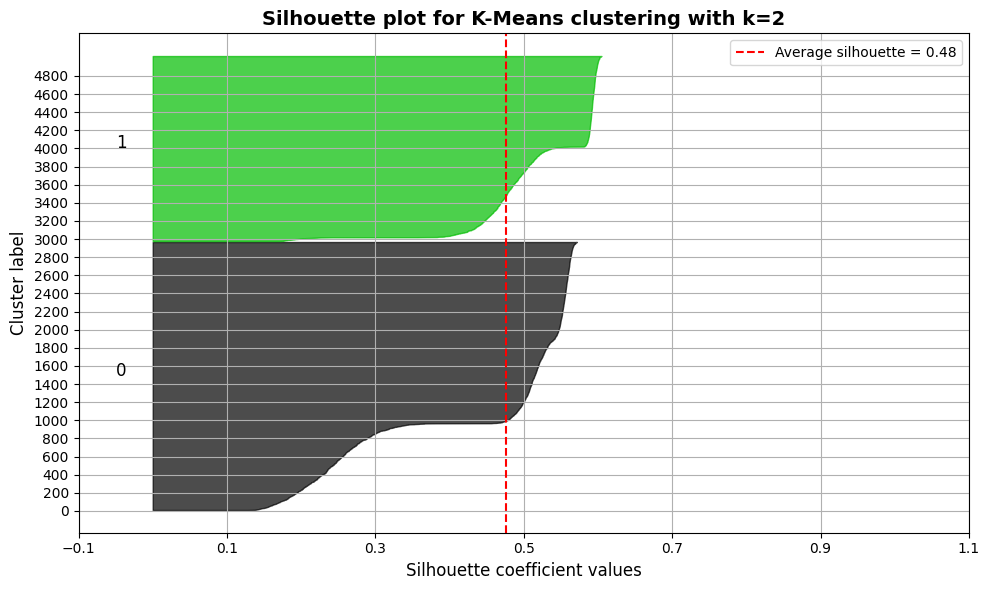

Silhouette Score for K-Means (k=3): 0.3613191927391265


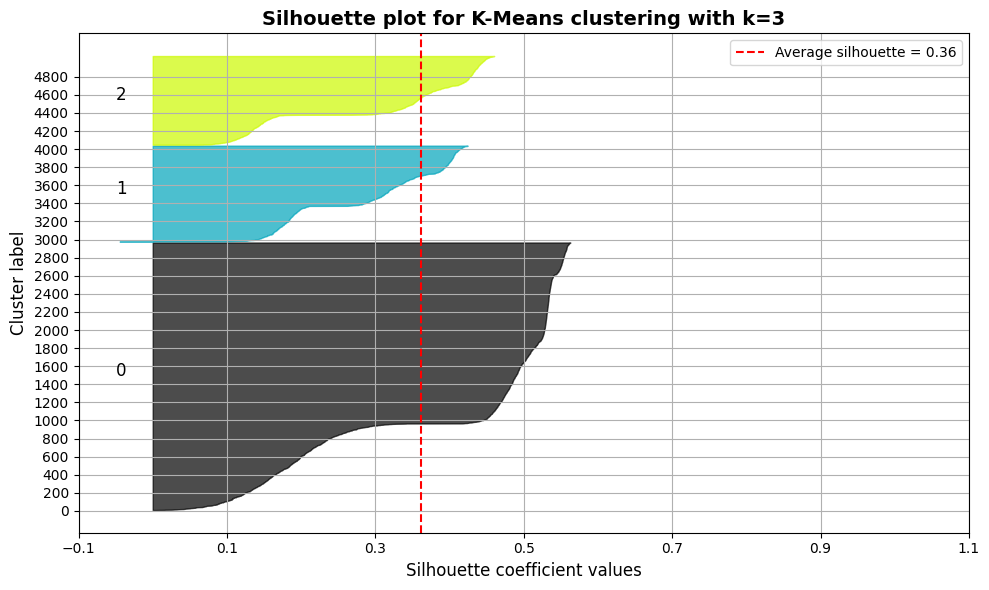

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

if k_optimal is not None:
    if k_optimal == 1: 
        k_start=k_optimal+1
        
    if k_optimal == 2: 
        k_start=k_optimal
    k_end=k_start+2

# Loop through different values of k and generate silhouette plots, starting from k=2
for k in range(k_start, k_end):
    # Fit K-Means with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_transformed)
    cluster_labels = kmeans.labels_
    
    # Silhouette score for K-Means clustering
    silhouette_avg = silhouette_score(df_transformed, cluster_labels)
    print(f'Silhouette Score for K-Means (k={k}): {silhouette_avg}')
    
    # Silhouette plot for K-Means clustering
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 6)

    # Silhouette values
    sample_silhouette_values = silhouette_samples(df_transformed, cluster_labels)

    y_lower = 10
    for i in range(k):
        # Aggregate the silhouette scores for samples in each cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        # Adjusting the color map to improve contrast between clusters
        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), fontsize=12)

        # Compute new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples gap between clusters

    ax1.set_title(f"Silhouette plot for K-Means clustering with k={k}", fontsize=14, fontweight='bold')
    ax1.set_xlabel("Silhouette coefficient values", fontsize=12)
    ax1.set_ylabel("Cluster label", fontsize=12)

    # The vertical line for average silhouette score of all values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"Average silhouette = {silhouette_avg:.2f}")

    # Setting fewer x-ticks and y-ticks
    ax1.set_yticks(np.arange(0, df_transformed.shape[0], 200))  # Y-ticks every 200 samples
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))  # X-ticks with larger intervals (every 0.2)

    plt.legend(loc='upper right')  # Add legend for average silhouette score
    plt.grid(True)  # Add gridlines for clarity
    plt.tight_layout()  # Improve spacing between plots
    plt.show()


#### K-means Clustering after dropping the categorical feature: 
```Python
'Subscription Type_Basic','Subscription Type_Free' and 'Subscription Type_Pro'
```

In [23]:
# Remove outliers:
# Calculate Z-scores
z_scores = stats.zscore(df[numerical_features])

# Create a boolean mask for outliers (Z-score > 3 or < -3)
outliers_mask = (z_scores > 3) | (z_scores < -3)

# Identify outliers
outliers = df[outliers_mask.any(axis=1)]

# Removing outliers from the dataset
filtered_dataset = df[~outliers_mask.any(axis=1)]

# Display the filtered dataset
print(f"Number of outliers removed: {len(outliers)}")
print(f"Filtered dataset shape: {filtered_dataset.shape}")
filtered_dataset.describe(include='all')

Number of outliers removed: 5
Filtered dataset shape: (5000, 6)


Subscription Type  Number of Logins  Avg Session Duration (mins)  \
count               5000       5000.000000                  5000.000000   
unique                 3               NaN                          NaN   
top                 Free               NaN                          NaN   
freq                1704               NaN                          NaN   
mean                 NaN         16.970000                    34.920808   
std                  NaN          7.195683                    14.439130   
min                  NaN          5.000000                    10.004903   
25%                  NaN         11.000000                    22.412517   
50%                  NaN         17.000000                    34.870373   
75%                  NaN         23.000000                    47.405136   
max                  NaN         29.000000                    59.987484   

        Feature Usage Count  Customer Lifetime (months)  Revenue Generated ($)  
count           5000.000000                 5000.000000            5000.000000  
unique                  NaN                         NaN                    NaN  
top                     NaN                         NaN                    NaN  
freq                    NaN                         NaN                    NaN  
mean               6.506000                   17.021800             175.044288  
std                2.876877                    7.193141              72.484345  
min                2.000000                    5.000000              50.161396  
25%                4.000000                   11.000000             112.527295  
50%                6.000000                   17.000000             174.653483  
75%                9.000000                   23.000000             238.549643  
max               11.000000                   29.000000             299.943424

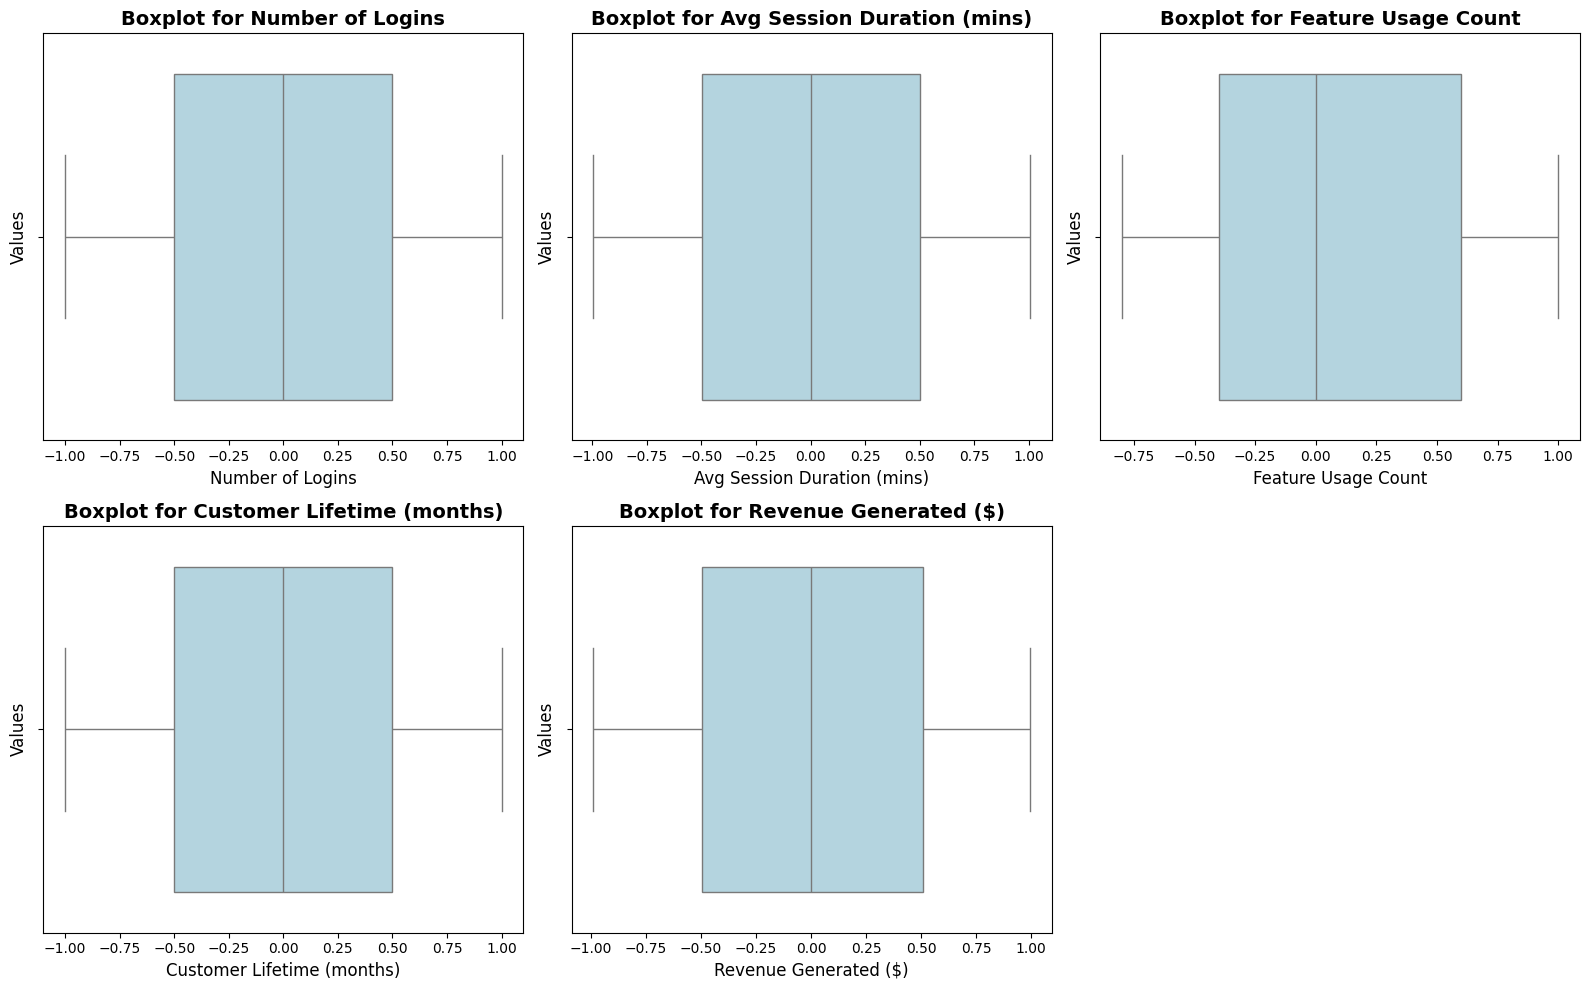

In [24]:
## Show boxplot after outlier removal
# Select only numerical columns from the filtered dataset
numerical_columns = filtered_dataset.select_dtypes(include=['float64', 'int64']).columns
# Scale the numerical columns using RobustScaler for better visual comparison
scaler = RobustScaler()
df_outlier_removed = pd.DataFrame(scaler.fit_transform(filtered_dataset[numerical_columns]), columns=numerical_columns)


# Display the boxplots:
plt.figure(figsize=(16, 10))

# Create individual enhanced boxplots for each numerical feature
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(
        x=df_outlier_removed[column], 
        color="lightblue", 
        flierprops=dict(markerfacecolor='r', marker='o', markersize=5)  # Red outlier points
    )
    plt.title(f"Boxplot for {column}", fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Values', fontsize=12)

# Adjust the layout for better visual aesthetics
plt.tight_layout()
plt.show()



In [25]:
# Define the preprocessing pipeline
preprocessor_numeric = ColumnTransformer(
    transformers=[
         ('num', RobustScaler(), numerical_features)
    ]
)


# Fit and transform the data using the preprocessor
transformed_data = preprocessor_numeric.fit_transform(filtered_dataset)
# Convert transformed data back to a DataFrame for easier manipulation
df_transformed = pd.DataFrame(transformed_data, columns=numerical_features)
#df_transformed.drop(['Cluster'], axis=1)
df_transformed.head(5)


Number of Logins  Avg Session Duration (mins)  Feature Usage Count  \
0         -0.250000                    -0.507825                 -0.4   
1          0.000000                    -0.154244                  0.2   
2          0.083333                    -0.082068                  0.2   
3         -0.416667                    -0.269273                 -0.4   
4         -0.916667                    -0.597464                 -0.6   

   Customer Lifetime (months)  Revenue Generated ($)  
0                   -0.250000              -0.588642  
1                   -0.083333              -0.110532  
2                    0.000000               0.004547  
3                   -0.500000              -0.446370  
4                   -0.916667              -0.931094

C:\Users\Debrup Banerjee\AppData\Local\Temp\ipykernel_18744\3805374671.py:24: DeprecationWarning: Arrays of 2-dimensional vectors are deprecated. Use arrays of 3-dimensional vectors instead. (deprecated in NumPy 2.0)
  distance = np.abs(np.cross(point2-point1, point1-point)) / np.linalg.norm(point2-point1)


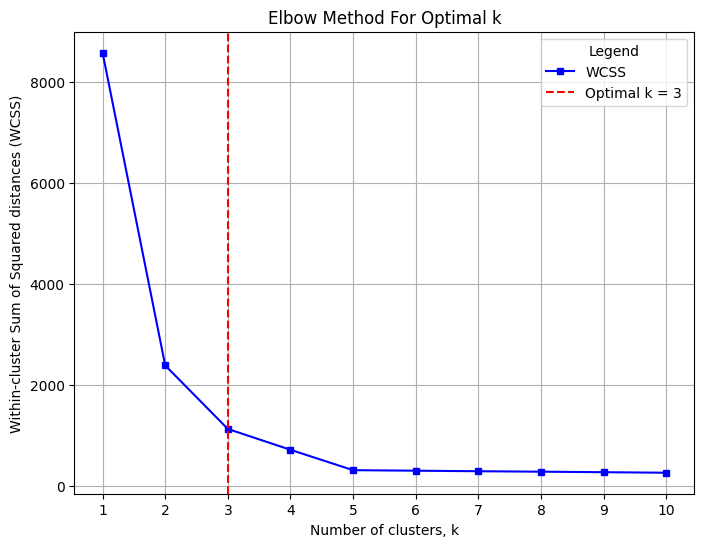

Optimal k value: 3


In [26]:
# Define the range of k values to try
k_values = range(1, 11)
inertias = []

# Fit KMeans and calculate inertia for each k
for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_transformed)  # Fit the model
    inertias.append(model.inertia_)  # Append the inertia for this k

# Convert to numpy array for further calculation
inertias = np.array(inertias)

# Manually find the elbow point by finding the point with the maximum distance
# Create a straight line between the first and last points
point1 = np.array([k_values[0], inertias[0]])  # First point (k=1, WCSS)
point2 = np.array([k_values[-1], inertias[-1]])  # Last point (k=max, WCSS)

# Calculate the distance of each point from the line connecting point1 and point2
distances = []
for i in range(len(k_values)):
    point = np.array([k_values[i], inertias[i]])
    # Compute the perpendicular distance from point to the line
    distance = np.abs(np.cross(point2-point1, point1-point)) / np.linalg.norm(point2-point1)
    distances.append(distance)

# Find the index of the maximum distance (the elbow point)
k_optimal = k_values[np.argmax(distances)]

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertias, 'bs-', markersize=4, label='WCSS')
plt.axvline(x=k_optimal, color='r', linestyle='--', label=f'Optimal k = {k_optimal}')
plt.xlabel('Number of clusters, k')
plt.ylabel('Within-cluster Sum of Squared distances (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.xticks(k_values)
plt.grid(True)

# Add a legend explaining the plot
plt.legend(loc='best', title='Legend')

# Display the plot
plt.show()

# Print the detected optimal k value
print(f"Optimal k value: {k_optimal}")



In [27]:
# Partition the df_transformed dataframe into train and test partitions
X_train, X_test = train_test_split(df_transformed, test_size=0.2, random_state=42)

In [28]:
# Fitting K-Means with optimal k (k_optimal is already assigned)
kmeans_pipeline = Pipeline(steps=[('preprocessor', preprocessor_numeric),
                                  ('cluster', KMeans(n_clusters=k_optimal, random_state=42))])

# Fit the pipeline on the entire transformed dataset (if you want clusters for the whole dataset)
df_transformed['KMeans_Cluster'] = kmeans_pipeline.fit_predict(df_transformed)

# Display the DataFrame with the new cluster labels
df_transformed.head()

Number of Logins  Avg Session Duration (mins)  Feature Usage Count  \
0         -0.250000                    -0.507825                 -0.4   
1          0.000000                    -0.154244                  0.2   
2          0.083333                    -0.082068                  0.2   
3         -0.416667                    -0.269273                 -0.4   
4         -0.916667                    -0.597464                 -0.6   

   Customer Lifetime (months)  Revenue Generated ($)  KMeans_Cluster  
0                   -0.250000              -0.588642               2  
1                   -0.083333              -0.110532               2  
2                    0.000000               0.004547               2  
3                   -0.500000              -0.446370               2  
4                   -0.916667              -0.931094               1

In [29]:
## Output the cluster counts
# Get cluster labels from the k-means model
labels = kmeans_pipeline.named_steps['cluster'].labels_

# Add cluster labels to the transformed DataFrame
df_transformed['Cluster'] = labels

# Perform value counts for clusters
cluster_counts = df_transformed['Cluster'].value_counts()

# Convert the cluster counts to a DataFrame
cluster_counts_df = cluster_counts.reset_index()

# Rename the columns for clarity
cluster_counts_df.columns = ['Cluster', 'Count']

# Display the resulting DataFrame
cluster_counts_df

Cluster  Count
0        0   2000
1        2   1980
2        1   1020

In [30]:
# Converting centroids to a dataframe
centroids = kmeans_pipeline.named_steps['cluster'].cluster_centers_
centroids_df = pd.DataFrame(centroids)  
centroids_df.head()

0         1         2         3         4
0  0.620833  0.601904  0.704600  0.625958  0.601996
1 -0.831046 -0.792851 -0.690980 -0.820180 -0.789851
2 -0.205303 -0.194450 -0.100202 -0.205177 -0.193353

In [31]:
# WSS values
# Get the WSS (inertia) from the trained KMeans model
wss = kmeans_pipeline.named_steps['cluster'].inertia_
print(f"Within-cluster sum of squares (WSS): {wss}")

Within-cluster sum of squares (WSS): 1134.7879783008516


Silhouette Score for K-Means (k=3): 0.7548238026708775


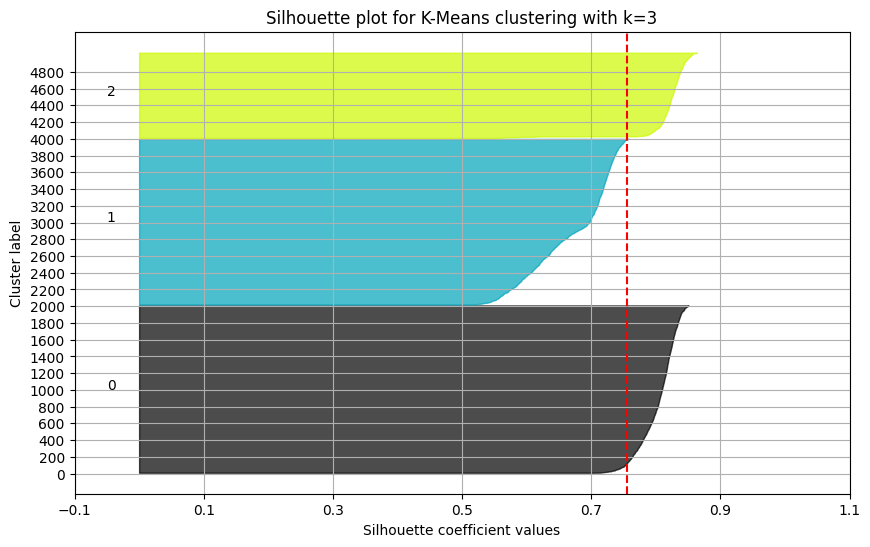

Silhouette Score for K-Means (k=4): 0.687120275520373


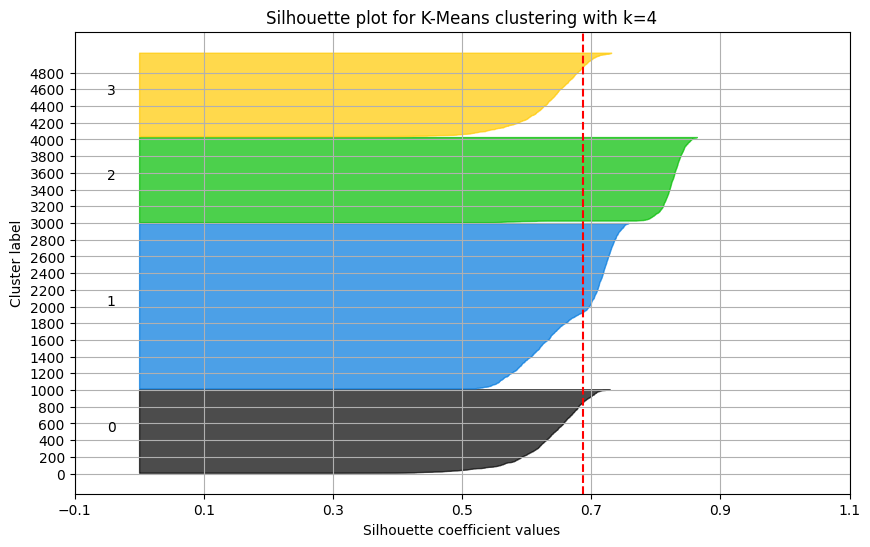

In [32]:
## K-MEANS CLUSTERING: SILHOUETTE SCORES

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from sklearn.cluster import KMeans

# Loop through different values of k and generate silhouette plots
for k in range(3, 5):
    # Fit K-Means with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_transformed)
    cluster_labels = kmeans.labels_
    
    # Silhouette score for K-Means clustering
    silhouette_avg = silhouette_score(df_transformed, cluster_labels)
    print(f'Silhouette Score for K-Means (k={k}): {silhouette_avg}')
    
    # Silhouette plot for K-Means clustering
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 6)

    # Silhouette values
    sample_silhouette_values = silhouette_samples(df_transformed, cluster_labels)

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples gap between clusters

    ax1.set_title(f"Silhouette plot for K-Means clustering with k={k}")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Setting fewer x-ticks and y-ticks
    ax1.set_yticks(np.arange(0, df_transformed.shape[0], 200))  # Y-ticks every 200 samples
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))  # X-ticks with larger intervals (every 0.2)

    plt.grid(True)  # Add gridlines for clarity
    plt.show()

In [33]:
k_optimal

3

### Agglomerative Clustering:

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import RobustScaler  # RobustScaler as preprocessor


# Specify categorical and numerical features
categorical_features = ['Subscription Type']
numerical_features = ['Number of Logins', 'Avg Session Duration (mins)', 'Feature Usage Count', 'Customer Lifetime (months)', 'Revenue Generated ($)']

# Define the preprocessor (RobustScaler works well for data with outliers)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', RobustScaler(), numerical_features)
    ]
)


# Create the clustering pipeline with preprocessing and Agglomerative Clustering
agg_clustering_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('cluster', AgglomerativeClustering(n_clusters=k_optimal))
])

# Fit the pipeline and predict clusters on the original DataFrame
df['Agglomerative_Cluster'] = agg_clustering_pipeline.fit_predict(df)

# Drop the 'Cluster' column if it exists, without errors if not found
df.drop(columns=['KMeans_Cluster'], errors='ignore', inplace=True)

# Display the first few rows of the DataFrame with the cluster labels
df.head()

Subscription Type  Number of Logins  Avg Session Duration (mins)  \
0              Free                14                    22.178507   
1               Pro                17                    31.015401   
2               Pro                18                    32.819273   
3               Pro                12                    28.140540   
4              Free                 6                    19.938184   

   Feature Usage Count  Customer Lifetime (months)  Revenue Generated ($)  \
0                    4                          14             100.471472   
1                    7                          16             160.723959   
2                    7                          17             175.226528   
3                    4                          11             118.400847   
4                    3                           6              57.314870   

   Agglomerative_Cluster  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

### Plot the Dendogram:

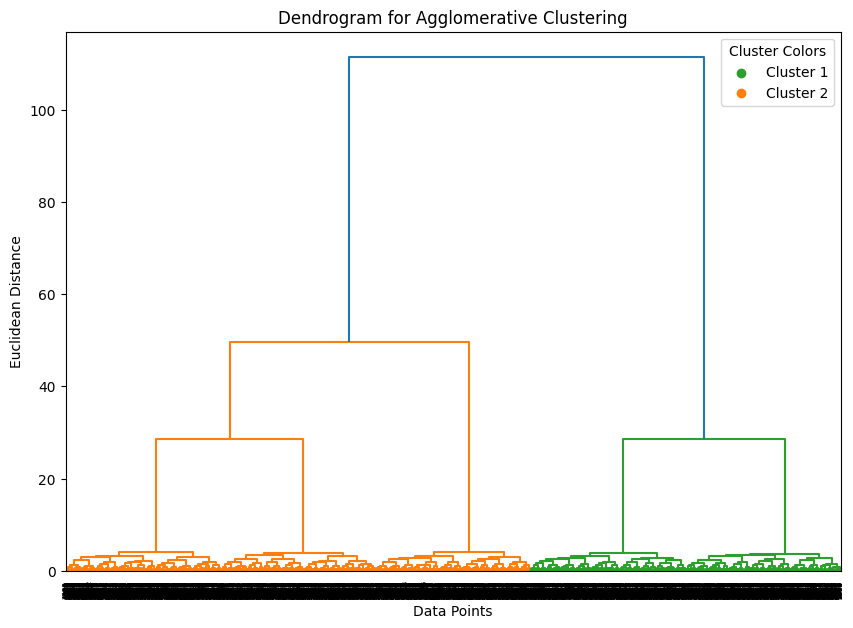

Subscription Type  Number of Logins  Avg Session Duration (mins)  \
0              Free                14                    22.178507   
1               Pro                17                    31.015401   
2               Pro                18                    32.819273   
3               Pro                12                    28.140540   
4              Free                 6                    19.938184   

   Feature Usage Count  Customer Lifetime (months)  Revenue Generated ($)  \
0                    4                          14             100.471472   
1                    7                          16             160.723959   
2                    7                          17             175.226528   
3                    4                          11             118.400847   
4                    3                           6              57.314870   

   Agglomerative_Cluster  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

In [35]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
import pandas as pd

# Assuming df is your original DataFrame
# Generate the linkage matrix for the dendrogram
linked = linkage(transformed_data, method='ward')

# Create the figure for the dendrogram
plt.figure(figsize=(10, 7))

# Plot the dendrogram and capture the color information
dendro = dendrogram(linked,
                    orientation='top',
                    distance_sort='descending',
                    show_leaf_counts=True)

# Retrieve the colors from the dendrogram
cluster_colors = set([color for color in dendro['leaves_color_list']])

# Plot the dendrogram
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")

# Adding a legend manually based on the colors used
legend_labels = [f'Cluster {i+1}' for i in range(len(cluster_colors))]

for i, color in enumerate(cluster_colors):
    plt.scatter([], [], color=color, label=legend_labels[i])

# Add the legend
plt.legend(loc='upper right', title="Cluster Colors")

# Show the plot
plt.show()

# Display the first few rows of the DataFrame with the cluster labels
df.head()


Silhouette Score for Agglomerative Clustering (k=3): 0.7548238026708775


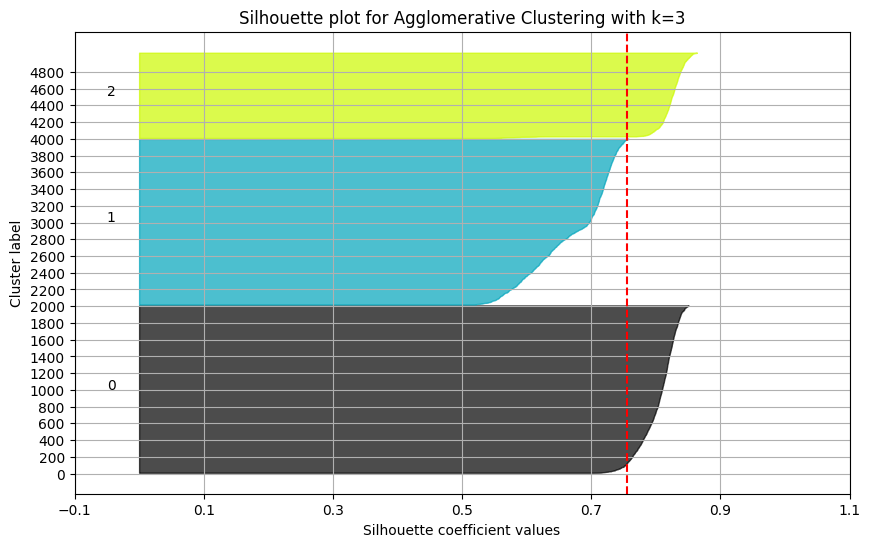

Silhouette Score for Agglomerative Clustering (k=4): 0.687120275520373


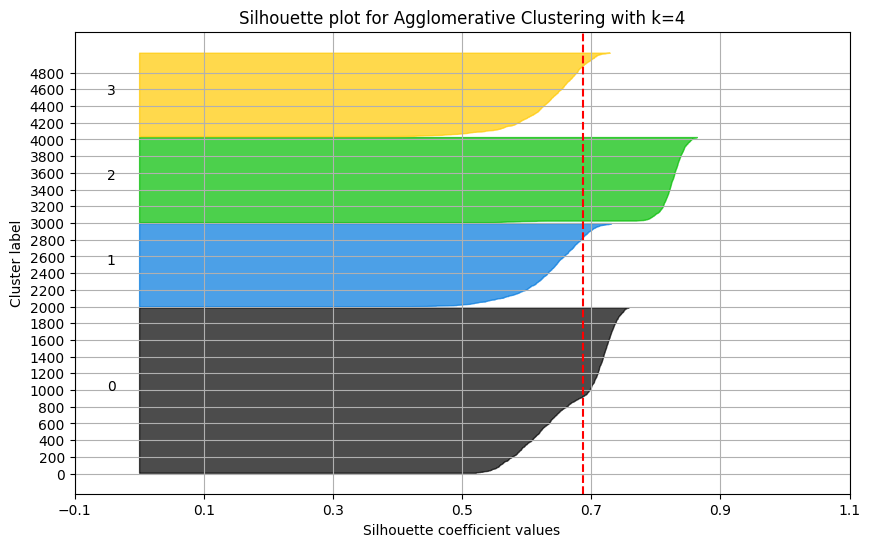

In [36]:
## AGGLOMERATIVE CLUSTERING : SILHOUETTE PLOTS

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering

# Transform the data using the preprocessor
# df_transformed = preprocessor.transform(df)

# Loop through different values of k and generate silhouette plots
for k in range(3, 5):
    # Fit Agglomerative Clustering with k clusters
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    cluster_labels = agg_clustering.fit_predict(df_transformed)
    
    # Silhouette score for Agglomerative Clustering
    silhouette_avg = silhouette_score(df_transformed, cluster_labels)
    print(f'Silhouette Score for Agglomerative Clustering (k={k}): {silhouette_avg}')
    
    # Silhouette plot for Agglomerative Clustering
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(10, 6)

    # Silhouette values
    sample_silhouette_values = silhouette_samples(df_transformed, cluster_labels)

    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples gap between clusters

    ax1.set_title(f"Silhouette plot for Agglomerative Clustering with k={k}")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Setting fewer x-ticks and y-ticks
    ax1.set_yticks(np.arange(0, df_transformed.shape[0], 200))  # Y-ticks every 200 samples
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))  # X-ticks with larger intervals (every 0.2)

    plt.grid(True)  # Add gridlines for clarity
    plt.show()


### DBSCAN - Density-Based Spatial Clustering of Applications with Noise Clustering:

In [37]:
# Hyperparameter tuning function definition
# Function to try different eps and min_samples combinations

def tune_dbscan(X_train):
    best_eps = None
    best_min_samples = None
    best_silhouette = -1  # Initialize silhouette score to the worst possible value
    best_ch_score = -1
    best_labels = None
    
    
    # Define a range of eps and min_samples to try
    eps_values = np.arange(0.1, 1.0, 0.1)  # You can adjust the range and step size as needed
    min_samples_values = range(3, 10)  # Range for min_samples


    # Loop over all combinations of eps and min_samples
    for eps in eps_values:
        for min_samples in min_samples_values:
            # Apply DBSCAN
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            train_labels = dbscan.fit_predict(X_train)
            
            # Ignore the iteration if only one cluster is found
            if len(set(train_labels)) > 1:
                # Calculate silhouette score and Calinski-Harabasz score
                silhouette_avg = silhouette_score(X_train, train_labels)
                calinski_harabasz = calinski_harabasz_score(X_train, train_labels)
                
                # Check if this is the best performing model
                if silhouette_avg > best_silhouette:
                    best_eps = eps
                    best_min_samples = min_samples
                    best_silhouette = silhouette_avg
                    best_ch_score = calinski_harabasz
                    best_labels = train_labels

    print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}")
    print(f"Best Silhouette Score: {best_silhouette}")
    print(f"Best Calinski-Harabasz Score: {best_ch_score}")
    return best_labels, best_eps, best_min_samples, train_labels

In [38]:
# Split the data into training and testing partitions (80% train, 20% test)
X_train, X_test = train_test_split(transformed_data, test_size=0.2, random_state=42)


In [39]:
transformed_data

array([[-0.25      , -0.50782459, -0.4       , -0.25      , -0.58864171],
       [ 0.        , -0.15424442,  0.2       , -0.08333333, -0.11053217],
       [ 0.08333333, -0.08206824,  0.2       ,  0.        ,  0.00454717],
       ...,
       [ 0.5       ,  0.38943882,  0.4       ,  0.58333333,  0.27449885],
       [ 0.25      ,  0.49768481,  0.6       ,  0.58333333,  0.24067684],
       [-1.        , -0.60242015, -0.8       , -0.83333333, -0.75807881]])

In [40]:
# Apply hyperparameter tuning to DBSCAN model to find the best hyper-parameters: eps and min_samples
best_train_labels, best_eps, best_min_samples, train_labels = tune_dbscan(X_train)

# Apply the tuned model to train
dbscan_best = DBSCAN(eps=best_eps, min_samples=best_min_samples) 
train_labels = dbscan_best.fit_predict(X_train)


# Add cluster labels to the training and test DataFrames
df_train = pd.DataFrame(X_train)
df_test = pd.DataFrame(X_test)
df_train['Cluster'] = train_labels


Best eps: 0.30000000000000004, Best min_samples: 3
Best Silhouette Score: 0.597611929136805
Best Calinski-Harabasz Score: 10329.589505409953


In [41]:
n_clusters = len(set(train_labels)) - (1 if -1 in train_labels else 0)  # Exclude the noise cluster if it exists
n_clusters

2

In [42]:
unique_train_labels = np.unique(train_labels)
unique_train_labels

array([0, 1])

#### The reason `k-Nearest Neighbors (kNN)` (NearestNeighbors) is being used in this code is due to a limitation with `DBSCAN`.

DBSCAN does not have a `predict()` method like K-Means. Once DBSCAN is trained on a dataset, `it cannot directly assign` cluster labels to new data points (test data) because DBSCAN does not learn explicit cluster centers like K-Means does. Instead, DBSCAN clusters are formed based on density and connectivity between data points, and there’s no mechanism to "classify" new data points into clusters.

#### What’s happening in the code:
In the absence of a predict() method for DBSCAN, `k-Nearest Neighbors (kNN)` is used as a workaround to label the test data:

#### `kNN` is used to find the nearest neighbors of each test point from the training data.
Each test data point is then assigned the cluster label of its nearest neighbor in the training data, which was assigned by DBSCAN.
This is why you see NearestNeighbors used in the code. It’s a way to propagate the training labels from DBSCAN to the test data based on proximity.

### NOW APPLY ON TEST DATASET:

In [43]:
# Use NearestNeighbors to label the test data based on the training data
# This approach assigns each test data point to the closest training data cluster
nn = NearestNeighbors(n_neighbors=1)
nn.fit(X_train)

# Get the nearest neighbors for the test data
distances, indices = nn.kneighbors(X_test)

# Assign cluster labels to test data points based on the nearest neighbor in the training data
test_labels = train_labels[indices.flatten()]

# Evaluate clustering on the test partition (using the nearest neighbor-based labels)
if len(set(test_labels)) > 1:  # Ensure there's more than one cluster
    test_silhouette_avg = silhouette_score(X_test, test_labels)
    print(f"Test Silhouette Score: {test_silhouette_avg}")

    test_calinski_harabasz = calinski_harabasz_score(X_test, test_labels)
    print(f"Test Calinski-Harabasz Score: {test_calinski_harabasz}")
else:
    print("Test data is assigned to a single cluster or no meaningful clusters.")

# Add cluster labels to the training and test DataFrames
df_train = pd.DataFrame(X_train)
df_test = pd.DataFrame(X_test)

df_train['Cluster'] = train_labels
df_test['Cluster'] = test_labels

Test Silhouette Score: 0.6087305032887591
Test Calinski-Harabasz Score: 2761.613341003759


Training Silhouette Score: 0.6087305032887591


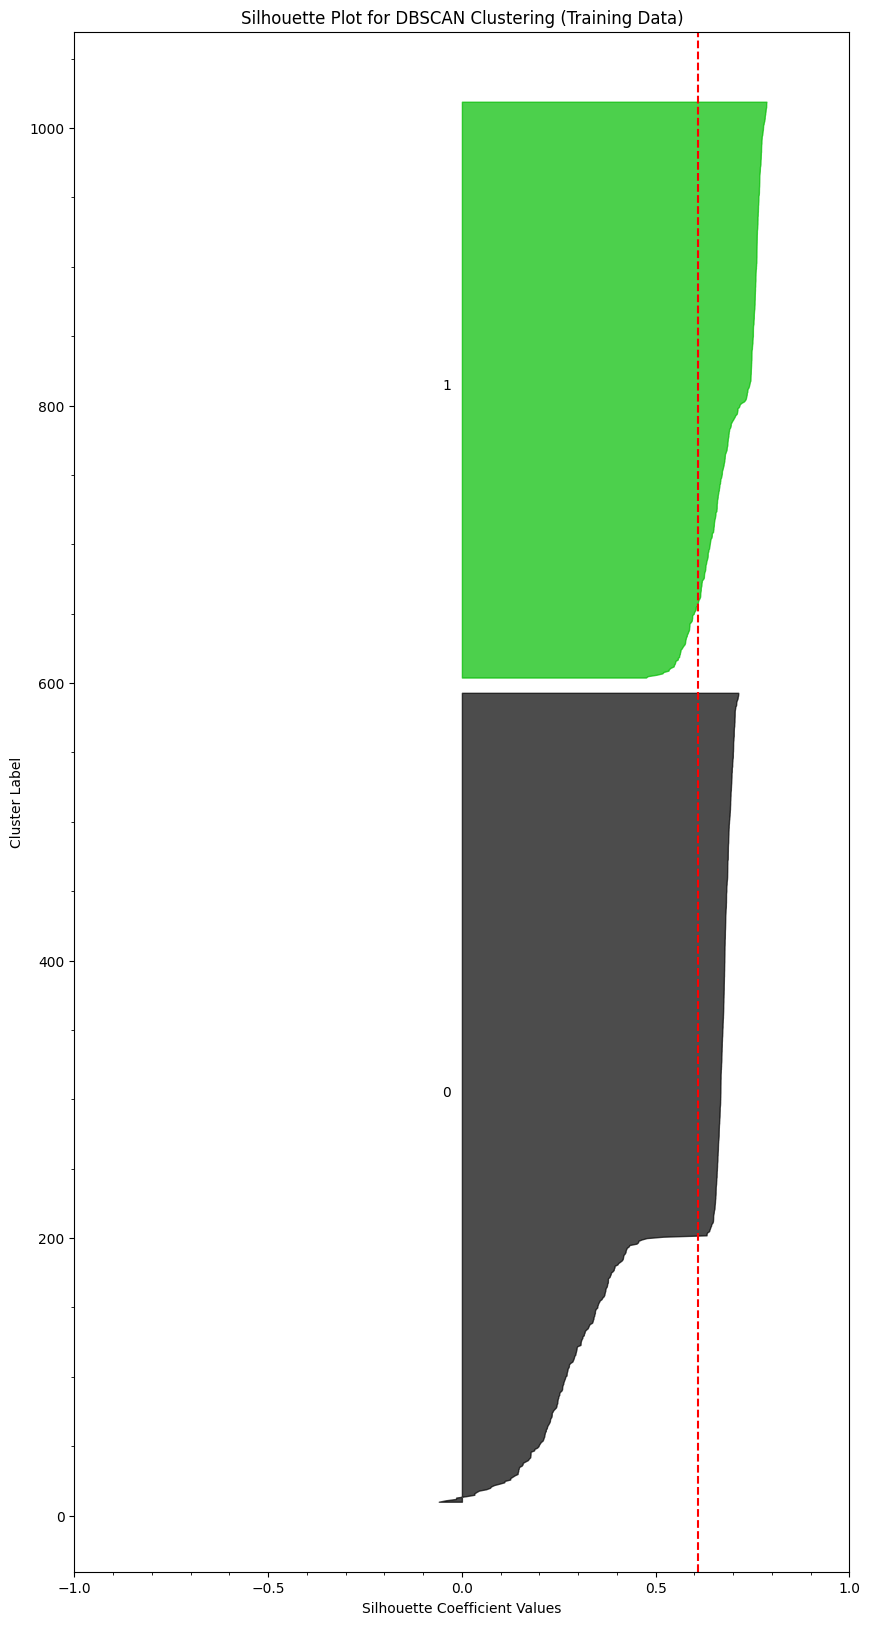

In [44]:
# Import the colormap library from matplotlib
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator

# Silhouette analysis (only if there are more than one cluster)
if len(set(test_labels)) > 1:
    silhouette_avg = silhouette_score(X_test, test_labels)
    print(f"Training Silhouette Score: {silhouette_avg}")
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_test, test_labels)
    
    # Create the silhouette plot
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(10, 20)

    y_lower = 10
    n_clusters = len(set(test_labels)) - (1 if -1 in test_labels else 0)  # Exclude the noise cluster if it exists
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples in the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[test_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with cluster numbers in the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples gap between silhouettes

    ax.set_title("Silhouette Plot for DBSCAN Clustering (Training Data)")
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

    # The vertical line for average silhouette score of all the values
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    # Major and minor ticks for the x-axis
    ax.set_xticks([-1, -0.5, 0, 0.5, 1])  # Major ticks for x-axis
    ax.xaxis.set_minor_locator(AutoMinorLocator(2))  # Add minor ticks for x-axis

    # Major and minor ticks for the y-axis
    ax.yaxis.set_minor_locator(AutoMinorLocator(2))  # Add minor ticks for y-axis
    ax.minorticks_on()  # Enable minor ticks on both axes

    # Display the plot
    plt.show()

else:
    print("DBSCAN found only one cluster or no meaningful clusters.")


### Practice Problem on Clustering: [Duration: 30 mins]

Perform k-means clustering on the handwritten digits dataset provided to you. 

In [47]:
import numpy as np

from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64
